In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=e3fafa6f8ebb527d32e4593481b620ccf3ec0c5a0b6fe7c48cabe7d69d8c2445
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


# Exploración de la data y preprocesamiento

In [153]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [154]:
# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [155]:
data1 = pd.read_excel('/content/twitter-tweetsSedapalOficial.xlsx')
spark_data1 = spark.createDataFrame(data1)
spark_data1.show(5)

+--------------------+----------+----------------------------+--------+--------+---------+-----------+-------------------+--------------------+----------------+--------------+----------------+---------------+--------------------+--------------------+--------------------+------------+--------------------+
|                Name|  Username|Tweet ID (click to view url)|Retweets|Comments|Favorites|Is Retweet?|               Date|          Tweet Text|Author Followers|Author Friends|Author Favorites|Author Statuses|          Author Bio|        Author Image|     Author Location|Tweet Source|          Status URL|
+--------------------+----------+----------------------------+--------+--------+---------+-----------+-------------------+--------------------+----------------+--------------+----------------+---------------+--------------------+--------------------+--------------------+------------+--------------------+
|Goku de Alianza L...|GokuAL1901|        ID: 1711112854751...|     NaN|     NaN|  

In [156]:
num_filas1 = spark_data1.count()
num_columnas1 = len(spark_data1.columns)
print(f"Número de filas: {num_filas1} y Número de columnas: {num_columnas1}")

Número de filas: 100 y Número de columnas: 18


In [157]:
data2 = pd.read_excel('/content/twitter-tweets654e9cca26cb3-SedapalOficial-1710807308274417990.xlsx')
spark_data2 = spark.createDataFrame(data2)
spark_data2.show(5)

+-------------------+-------------+----------------------------+--------+--------+---------+-----------+-------------------+--------------------+----------------+--------------+----------------+---------------+--------------------+--------------------+---------------+------------+--------------------+
|               Name|     Username|Tweet ID (click to view url)|Retweets|Comments|Favorites|Is Retweet?|               Date|          Tweet Text|Author Followers|Author Friends|Author Favorites|Author Statuses|          Author Bio|        Author Image|Author Location|Tweet Source|          Status URL|
+-------------------+-------------+----------------------------+--------+--------+---------+-----------+-------------------+--------------------+----------------+--------------+----------------+---------------+--------------------+--------------------+---------------+------------+--------------------+
|Gata bajo la lluvia|     Katdel97|        ID: 1710807308274...|     NaN|     NaN|      2.0

In [158]:
num_filas2 = spark_data2.count()
num_columnas2 = len(spark_data2.columns)
print(f"Número de filas: {num_filas2} y Número de columnas: {num_columnas2}")

Número de filas: 60 y Número de columnas: 18


In [159]:
# Unir los DataFrames por nombre de columna
df_union = spark_data1.union(spark_data2)
df_union.show()

+--------------------+---------------+----------------------------+--------+--------+---------+-----------+-------------------+--------------------+----------------+--------------+----------------+---------------+--------------------+--------------------+--------------------+------------+--------------------+
|                Name|       Username|Tweet ID (click to view url)|Retweets|Comments|Favorites|Is Retweet?|               Date|          Tweet Text|Author Followers|Author Friends|Author Favorites|Author Statuses|          Author Bio|        Author Image|     Author Location|Tweet Source|          Status URL|
+--------------------+---------------+----------------------------+--------+--------+---------+-----------+-------------------+--------------------+----------------+--------------+----------------+---------------+--------------------+--------------------+--------------------+------------+--------------------+
|Goku de Alianza L...|     GokuAL1901|        ID: 1711112854751...|

In [160]:
num_filas3 = df_union.count()
num_columnas3 = len(df_union.columns)
print(f"Número de filas: {num_filas3} y Número de columnas: {num_columnas3}")

Número de filas: 160 y Número de columnas: 18


In [161]:
df_union.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Username: string (nullable = true)
 |-- Tweet ID (click to view url): string (nullable = true)
 |-- Retweets: double (nullable = true)
 |-- Comments: double (nullable = true)
 |-- Favorites: double (nullable = true)
 |-- Is Retweet?: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Tweet Text: string (nullable = true)
 |-- Author Followers: long (nullable = true)
 |-- Author Friends: long (nullable = true)
 |-- Author Favorites: long (nullable = true)
 |-- Author Statuses: long (nullable = true)
 |-- Author Bio: string (nullable = true)
 |-- Author Image: string (nullable = true)
 |-- Author Location: string (nullable = true)
 |-- Tweet Source: double (nullable = true)
 |-- Status URL: string (nullable = true)



In [162]:
dft = df_union.toPandas()
dft.shape

(160, 18)

In [163]:
dft.head()

,Name,Username,Tweet ID (click to view url),Retweets,Comments,Favorites,Is Retweet?,Date,Tweet Text,Author Followers,Author Friends,Author Favorites,Author Statuses,Author Bio,Author Image,Author Location,Tweet Source,Status URL
0,Goku de Alianza Lima | BICAMPEÓN,GokuAL1901,ID: 1711112854751838458,NaN,NaN,NaN,no,2023-10-08 20:14:52,@SedapalOficial 4 días creo,381,113,0,6686,Vnico tetracampeón 👑🏆 | Fan de la liga más pod...,https://pbs.twimg.com/profile_images/170975350...,Alejandro Villanueva,NaN,https://www.twitter.com/GokuAL1901/status/1711...
1,wrayan WYN,wrayan_wyn,ID: 1711112854751838458,NaN,NaN,1.0,no,2023-10-08 20:15:45,@SedapalOficial No sobraran por el agua juntada :,0,29,1,31,Hola (:,https://pbs.twimg.com/profile_images/145758685...,NaN,NaN,https://www.twitter.com/wrayan_wyn/status/1711...
2,Mesías García P.,MesasPrez,ID: 1711112854751838458,3.0,NaN,9.0,no,2023-10-08 20:25:23,@SedapalOficial Al de la absurda idea de AMENA...,934,2352,9,154896,Viajero de mundos. La cólera o el odio son com...,https://pbs.twimg.com/profile_images/807281780...,NaN,NaN,https://www.twitter.com/MesasPrez/status/17111...
3,Colectivo Parálisis Cerebral Perú,CopacePeru,ID: 1711112854751838458,NaN,NaN,NaN,no,2023-10-08 20:31:54,@SedapalOficial Revisen DM . Por favor. Estamo...,1372,1254,0,30842,Impulsora de #AjustesRazonables en el trabajo ...,https://pbs.twimg.com/profile_images/158809053...,Lima Callao,NaN,https://www.twitter.com/CopacePeru/status/1711...
4,ǤⓊรтαvσ,CarryZarra,ID: 1711112854751838458,NaN,NaN,NaN,no,2023-10-08 20:46:38,@SedapalOficial 🤡,229,1095,0,7338,Médico Veterinario 🇵🇪 🐂🐃🐄,https://pbs.twimg.com/profile_images/164273229...,NaN,NaN,https://www.twitter.com/CarryZarra/status/1711...


In [164]:
dft=dft[['Date','Tweet Text','Author Location']]
dft

,Date,Tweet Text,Author Location
0,2023-10-08 20:14:52,@SedapalOficial 4 días creo,Alejandro Villanueva
1,2023-10-08 20:15:45,@SedapalOficial No sobraran por el agua juntada :,NaN
2,2023-10-08 20:25:23,@SedapalOficial Al de la absurda idea de AMENA...,NaN
3,2023-10-08 20:31:54,@SedapalOficial Revisen DM . Por favor. Estamo...,Lima Callao
4,2023-10-08 20:46:38,@SedapalOficial 🤡,NaN
...,...,...,...
155,2023-10-11 19:40:11,"@SedapalOficial PRIMERO SEÑORES DE SEDAPAL, DE...",NaN
156,2023-10-12 19:29:25,@SedapalOficial @SedapalOficial señores SEDAP...,Lima-Peru
157,2023-10-14 15:54:11,"@SedapalOficial Falso, el suministro 2804276 a...",Lima-Peru
158,2023-10-14 23:57:28,@SedapalOficial Todos los fines de semana cort...,NaN


In [165]:
dft.isna().sum()

Date               0
Tweet Text         0
Author Location    0
dtype: int64

# Limpieza de la data

In [166]:
!pip install unidecode

In [167]:
import unidecode
import re
dft['Tweet Text'] = dft['Tweet Text'].str.lower()  #convertir a minusculas
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x :unidecode.unidecode(x))  #Eliminación de acentos
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x: ' '.join(re.sub("(@[AZa-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())) #eliminar las palabras que contengan @, #, emojis y urls
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))  #Eliminación de números
dft[['Tweet Text']]

,Tweet Text
0,dias creo
1,no sobraran por el agua juntada
2,al de la absurda idea de amenazar a los ciudad...
3,revisen dm por favor estamos esperando desde e...
4,
...,...
155,primero senores de sedapal desistir de las ofi...
156,senores sedapal mi suministro es en villa mar...
157,falso el suministro aun no tiene agua desde e...
158,todos los fines de semana cortan el agua sin d...


In [168]:
#### Eliminacóon de palabras poco relevantes para el análisis
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x: ' '.join(re.sub("^|senores|dm|sjm|sres|sedapal|q "," ",x).split()))
dft[['Tweet Text']]

,Tweet Text
0,dias creo
1,no sobraran por el agua juntada
2,al de la absurda idea de amenazar a los ciudad...
3,revisen por favor estamos esperando desde el v...
4,
...,...
155,primero de desistir de las oficinas de san isi...
156,mi suministro es en villa maria del triunfo no...
157,falso el suministro aun no tiene agua desde el...
158,todos los fines de semana cortan el agua sin d...


# Tokenización de Tweets

In [169]:
import nltk
from nltk.tokenize import word_tokenize

In [170]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [171]:
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x:nltk.word_tokenize(x))
dft[['Tweet Text']]

,Tweet Text
0,"[dias, creo]"
1,"[no, sobraran, por, el, agua, juntada]"
2,"[al, de, la, absurda, idea, de, amenazar, a, l..."
3,"[revisen, por, favor, estamos, esperando, desd..."
4,[]
...,...
155,"[primero, de, desistir, de, las, oficinas, de,..."
156,"[mi, suministro, es, en, villa, maria, del, tr..."
157,"[falso, el, suministro, aun, no, tiene, agua, ..."
158,"[todos, los, fines, de, semana, cortan, el, ag..."


In [172]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [173]:
from nltk.corpus import stopwords
list_stopwords=stopwords.words('spanish')
list_stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [174]:
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x:[word for word in x if word not in stopwords.words('spanish')])
dft[['Tweet Text']]

,Tweet Text
0,"[dias, creo]"
1,"[sobraran, agua, juntada]"
2,"[absurda, idea, amenazar, ciudadanos, cortar, ..."
3,"[revisen, favor, esperando, viernes]"
4,[]
...,...
155,"[primero, desistir, oficinas, san, isidro, ir,..."
156,"[suministro, villa, maria, triunfo, agua, vier..."
157,"[falso, suministro, aun, agua, viernes, pasado..."
158,"[fines, semana, cortan, agua, decir, urbanizac..."


# Análisis Exploratorio

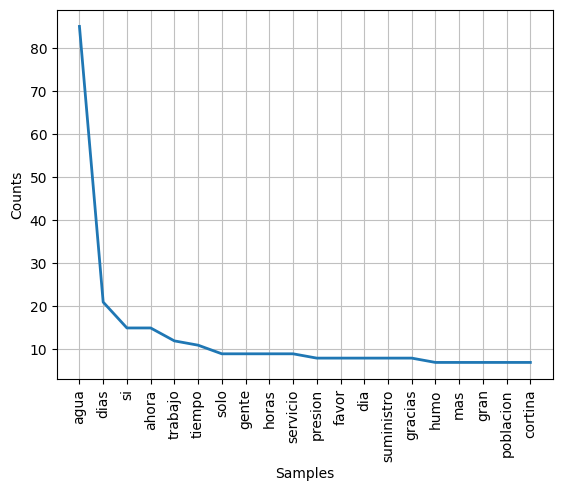

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
from nltk.probability import FreqDist  #se utiliza para calcular la frecuencia de  elementos en una lista.

freq_pal = nltk.FreqDist([w for tokenlist in dft['Tweet Text'].values for w in tokenlist])
freq_pal.plot(20)


In [25]:
#### lista de palabras mas comunes
top_words = freq_pal.most_common(50)
top_words

[('agua', 85),
 ('dias', 21),
 ('si', 15),
 ('ahora', 15),
 ('trabajo', 12),
 ('tiempo', 11),
 ('solo', 9),
 ('gente', 9),
 ('horas', 9),
 ('servicio', 9),
 ('presion', 8),
 ('favor', 8),
 ('dia', 8),
 ('suministro', 8),
 ('gracias', 8),
 ('humo', 7),
 ('mas', 7),
 ('gran', 7),
 ('poblacion', 7),
 ('cortina', 7),
 ('villa', 7),
 ('dinero', 6),
 ('bien', 6),
 ('hicieron', 6),
 ('corte', 6),
 ('aviso', 6),
 ('hacer', 6),
 ('volvio', 5),
 ('prensa', 5),
 ('hace', 5),
 ('compre', 5),
 ('felicitaciones', 5),
 ('habra', 5),
 ('quedamos', 5),
 ('nunca', 5),
 ('tachos', 5),
 ('asi', 5),
 ('ser', 5),
 ('bidones', 5),
 ('puede', 5),
 ('hoy', 5),
 ('varios', 4),
 ('compraron', 4),
 ('problema', 4),
 ('baldes', 4),
 ('aun', 4),
 ('buen', 4),
 ('distritos', 4),
 ('mes', 4),
 ('muchas', 4)]

In [175]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
### Mas limpieza de datos para los gráficos de nubes de palabras
### Destokenización de palabras.
dft['Tweet Text'] = dft['Tweet Text'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))
dft[['Tweet Text']]

,Tweet Text
0,dias creo
1,sobraran agua juntada
2,absurda idea amenazar ciudadanos cortar agua v...
3,revisen favor esperando viernes
4,
...,...
155,primero desistir oficinas san isidro ir conos ...
156,suministro villa maria triunfo agua viernes pa...
157,falso suministro aun agua viernes pasado pese ...
158,fines semana cortan agua decir urbanizacion um...


In [176]:
import numpy as np
dft['Tweet Text'] = dft['Tweet Text'].replace('',np.nan)
dft[['Tweet Text']]

,Tweet Text
0,dias creo
1,sobraran agua juntada
2,absurda idea amenazar ciudadanos cortar agua v...
3,revisen favor esperando viernes
4,NaN
...,...
155,primero desistir oficinas san isidro ir conos ...
156,suministro villa maria triunfo agua viernes pa...
157,falso suministro aun agua viernes pasado pese ...
158,fines semana cortan agua decir urbanizacion um...


In [177]:
dft = dft.dropna(axis=0,how = "any")
dft

,Date,Tweet Text,Author Location
0,2023-10-08 20:14:52,dias creo,Alejandro Villanueva
1,2023-10-08 20:15:45,sobraran agua juntada,NaN
2,2023-10-08 20:25:23,absurda idea amenazar ciudadanos cortar agua v...,NaN
3,2023-10-08 20:31:54,revisen favor esperando viernes,Lima Callao
5,2023-10-08 20:47:58,vete carajo compraron mierdas juntar agua dia ...,NaN
...,...,...,...
155,2023-10-11 19:40:11,primero desistir oficinas san isidro ir conos ...,NaN
156,2023-10-12 19:29:25,suministro villa maria triunfo agua viernes pa...,Lima-Peru
157,2023-10-14 15:54:11,falso suministro aun agua viernes pasado pese ...,Lima-Peru
158,2023-10-14 23:57:28,fines semana cortan agua decir urbanizacion um...,NaN


In [178]:
import plotly.express as px
from datetime import timedelta
from datetime import datetime
### Meses en los que más se realizan Tweets
dft['Date'] = pd.to_datetime(dft['Date'])-timedelta(hours=5)
meses = dft['Date'].dt.month_name().value_counts().index.tolist()
valores = dft['Date'].dt.month_name().value_counts()/sum(dft['Date'].dt.month_name().value_counts())
fig = px.bar(x=meses, y=valores, text_auto=True,labels={"x":"Mes del año", "y": "Porcentaje"})
fig.show()


<ipython-input-178-310c75dd1219>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
### Días en los que más se realizan Tweets
dft['Date'] = pd.to_datetime(dft['Date'])-timedelta(hours=5)
dias = dft['Date'].dt.day_name().value_counts().index.tolist()
valores = dft['Date'].dt.day_name().value_counts()/sum(dft['Date'].dt.day_name().value_counts())
fig = px.bar(x=dias, y=valores, text_auto=True,labels={"x":"Día de la semana", "y": "Porcentaje"})
fig.show()

<ipython-input-41-c628d56e1144>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
### Horas del día en las que más se realizan Tweets
horas = dft['Date'].dt.hour.value_counts().index.tolist()
valores = dft['Date'].dt.hour.value_counts()/sum(dft['Date'].dt.hour.value_counts())
fig = px.bar(x=horas, y=valores,labels={"x":"Hora del día", "y": "Porcentaje"})
fig.show()

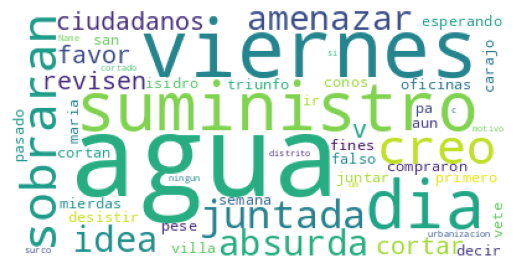

In [43]:
#Nube de palabras con las 50 palabras más frecuentes
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color = "white", max_words = 50).generate(str(dft['Tweet Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


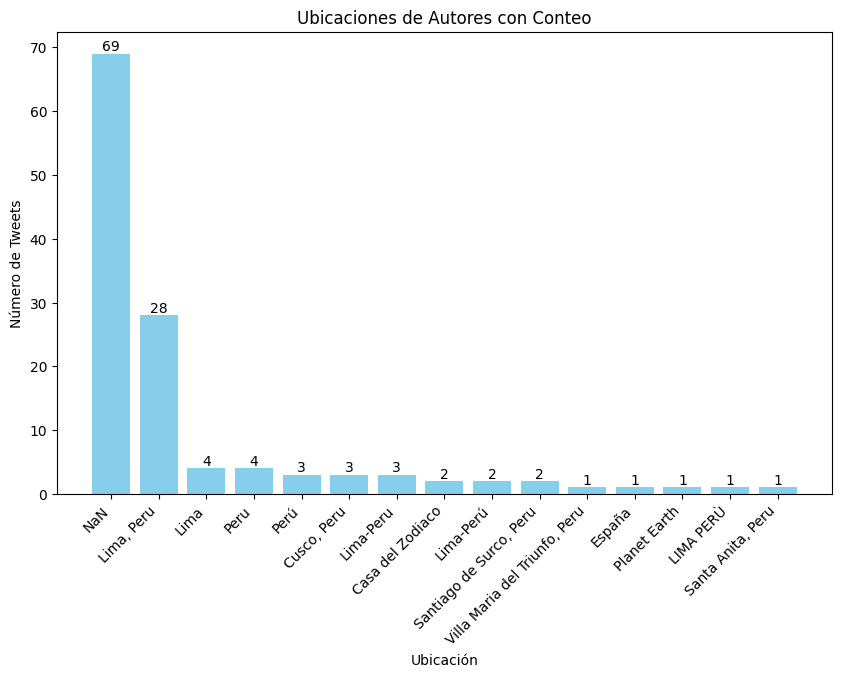

In [52]:
location_counts = dft['Author Location'].value_counts()

top_locations = location_counts.head(15)


plt.figure(figsize=(10, 6))
bars = plt.bar(top_locations.index, top_locations.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.title('Ubicaciones de Autores con Conteo')
plt.xlabel('Ubicación')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

#Etiquetado del Conjunto de Entrenamiento


In [53]:
!pip install sentiment_analysis_spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 31.3 MB/s eta 0:00:00


In [54]:
from sentiment_analysis_spanish import sentiment_analysis

In [179]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [180]:
dft['puntaje'] = np.round(dft['Tweet Text'].apply(lambda x: sentiment.sentiment(x)),2)
dft['clasificacion'] = np.where((dft['puntaje']>=0) & (dft['puntaje']<0.33),
"negativo",
np.where((dft['puntaje']>=0.33) & (dft['puntaje']<0.66),
"neutro",
np.where((dft['puntaje']>=0.66) & (dft['puntaje']<=1),
"positivo",np.nan)))
dft['clasificacion'].value_counts() / np.sum(dft['clasificacion'].value_counts())

<ipython-input-180-8cb4c32dbb6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-180-8cb4c32dbb6d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



negativo    0.620000
neutro      0.326667
positivo    0.053333
Name: clasificacion, dtype: float64

In [181]:
dft

,Date,Tweet Text,Author Location,puntaje,clasificacion
0,2023-10-08 15:14:52,dias creo,Alejandro Villanueva,0.17,negativo
1,2023-10-08 15:15:45,sobraran agua juntada,NaN,0.31,negativo
2,2023-10-08 15:25:23,absurda idea amenazar ciudadanos cortar agua v...,NaN,0.23,negativo
3,2023-10-08 15:31:54,revisen favor esperando viernes,Lima Callao,0.00,negativo
5,2023-10-08 15:47:58,vete carajo compraron mierdas juntar agua dia ...,NaN,0.03,negativo
...,...,...,...,...,...
155,2023-10-11 14:40:11,primero desistir oficinas san isidro ir conos ...,NaN,0.00,negativo
156,2023-10-12 14:29:25,suministro villa maria triunfo agua viernes pa...,Lima-Peru,0.00,negativo
157,2023-10-14 10:54:11,falso suministro aun agua viernes pasado pese ...,Lima-Peru,0.01,negativo
158,2023-10-14 18:57:28,fines semana cortan agua decir urbanizacion um...,NaN,0.01,negativo


In [202]:
#descarga del dataframe limpio
from google.colab import files
dft.to_csv('data_limpio_etiq.csv', index=False)
files.download('data_limpio_etiq.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
copia_dft=dft.copy()

In [183]:
print(len(dft[dft['clasificacion'] == 'positivo']))
print(len(dft[dft['clasificacion'] == 'negativo']))
print(len(dft[dft['clasificacion'] == 'neutro']))

8
93
49


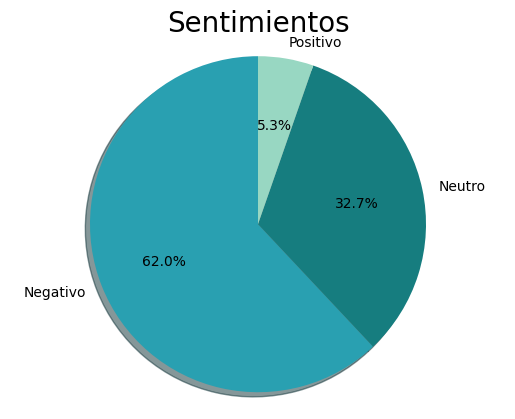

In [59]:
import matplotlib.pyplot as plt
labels = 'Negativo', 'Neutro', 'Positivo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(dft['clasificacion'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Sentimientos', fontsize = 20)
plt.axis('equal')
plt.show()

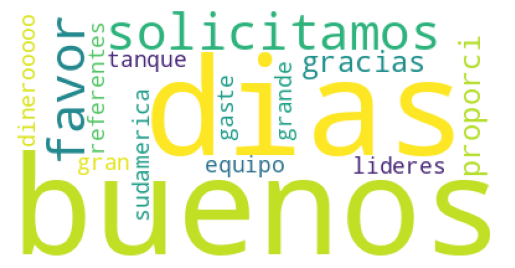

In [60]:
### Nubes de palabras por polaridad o sentimiento asociado
### Positivo
positivos = dft[dft["clasificacion"]=="positivo"]
wordcloud = WordCloud(background_color = "white", max_words = 15).generate(str(positivos['Tweet Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


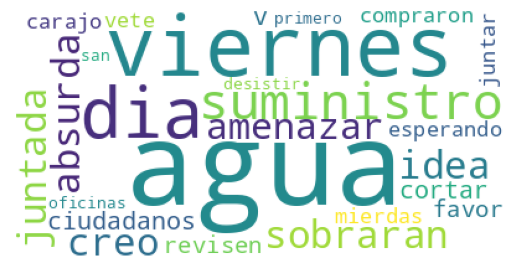

In [61]:
### Negativo
negativo = dft[dft["clasificacion"]=="negativo"]
wordcloud = WordCloud(background_color = "white", max_words = 25).generate(str(negativo['Tweet Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

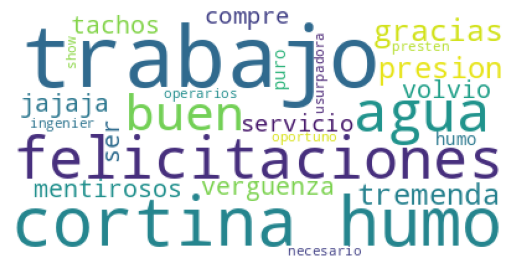

In [62]:
### Neutro
neutro = dft[dft["clasificacion"]=="neutro"]
wordcloud = WordCloud(background_color = "white", max_words = 25).generate(str(neutro['Tweet Text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#Entrenamiento de la Red Neuronal


In [63]:
from sklearn.utils import shuffle
import tensorflow as tf
### Conversión de la columna clasificación a un objeto tipo Tensor entendible
### para la red neuronal
dft = dft[['Tweet Text','clasificacion']]
dft = shuffle(dft, random_state=1234)
labels = np.array(dft['clasificacion'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutro':
        y.append(0)
    if labels[i] == 'negativo':
        y.append(1)
    if labels[i] == 'positivo':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y
labels[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [64]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
### Conversión de la columna text a tipo tensor mediante la técnica one hot encoding
data = np.array(dft['Tweet Text'])
max_words = 3000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   2 199  63 200   1  42  22 107 201 202
 203 204]


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, train_size=0.8, random_state=1234)

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding, Bidirectional
from keras import layers
model2 = Sequential()
model2.add(layers.Embedding(max_words, 30, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(50,dropout=0.5)))
model2.add(layers.Dense(25,activation = "relu"))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(3,activation='softmax'))


model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
from keras.callbacks import ModelCheckpoint

#### Guardando el mejor modelo
checkpoint2 = ModelCheckpoint("be_model2.hdf5", monitor='val_accuracy',verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [68]:
#### Ajustando el modelo con 30 iteracciones
history = model2.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 1.0891 - accuracy: 0.4250
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to be_model2.hdf5
4/4 [==============================] - 10s 633ms/step - loss: 1.0891 - accuracy: 0.4250 - val_loss: 1.0598 - val_accuracy: 0.6667
Epoch 2/20
1/4 [======>.......................] - ETA: 0s - loss: 1.0688 - accuracy: 0.5938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



4/4 [==============================] - ETA: 0s - loss: 1.0587 - accuracy: 0.6167
Epoch 2: val_accuracy did not improve from 0.66667
4/4 [==============================] - 1s 174ms/step - loss: 1.0587 - accuracy: 0.6167 - val_loss: 1.0149 - val_accuracy: 0.6667
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 1.0238 - accuracy: 0.5833
Epoch 3: val_accuracy did not improve from 0.66667
4/4 [==============================] - 1s 177ms/step - loss: 1.0238 - accuracy: 0.5833 - val_loss: 0.9509 - val_accuracy: 0.6667
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.9629 - accuracy: 0.5750
Epoch 4: val_accuracy did not improve from 0.66667
4/4 [==============================] - 1s 169ms/step - loss: 0.9629 - accuracy: 0.5750 - val_loss: 0.8445 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - ETA: 0s - loss: 0.9104 - accuracy: 0.6167
Epoch 5: val_accuracy did not improve from 0.66667
4/4 [==============================] - 1s 178ms/step

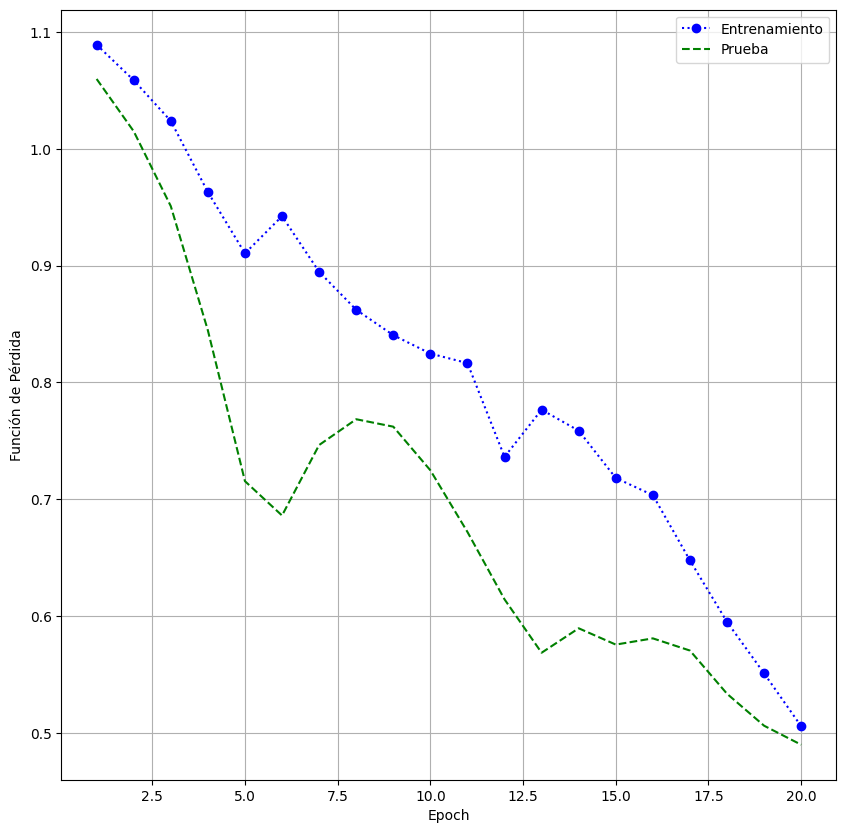

In [69]:
### Verificación mediante la funcion de perdida si existe overfitting
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
fig = plt.figure(figsize=(7,7))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, ':',label='Entrenamiento',color = "blue",marker = "o")
plt.xlabel("Epoch")
plt.ylabel("Función de Pérdida")
plt.plot(epoch,val_loss_values, '--',label='Prueba',color = "green")
plt.grid()
plt.legend()
plt.show()

In [70]:
### evaluanado el modelo con el conjunto de prueba
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 56ms/step - loss: 0.4898 - accuracy: 0.8667


[0.4897647202014923, 0.8666666746139526]

In [71]:
### realizando las predicciones
predictions = model2.predict(X_test)

1/1 [==============================] - 1s 898ms/step


In [85]:
predicted_labels = np.argmax(predictions, axis=1)

In [86]:
predictions_df = pd.DataFrame({'Predicted_Label': predicted_labels, 'Tweet Text': X_test.tolist()})


In [72]:
predictions[0]

array([0.49770048, 0.4304176 , 0.07188194], dtype=float32)

In [73]:
### verificando que la suma de todas las predicciones de 1
np.sum(predictions[0])

1.0

In [88]:
print("Dimensiones de X_test:", X_test.shape)
print("Número de muestras en X_test:", len(X_test))


Dimensiones de X_test: (30, 200)
Número de muestras en X_test: 30


In [87]:
positive_predictions = predictions_df[predictions_df['Predicted_Label'] == 2]['Tweet Text']
negativo_predictions = predictions_df[predictions_df['Predicted_Label'] == 1]['Tweet Text']
neutro_predictions = predictions_df[predictions_df['Predicted_Label'] == 0]['Tweet Text']
print("número de valores predichos positivos", positive_predictions.shape)
print("número de valores predichos negativos",negativo_predictions.shape)
print("número de valores predichos neutross",neutro_predictions.shape)

número de valores predichos positivos (0,)
número de valores predichos negativos (20,)
número de valores predichos neutross (10,)


#Evaluación del Modelo

<ipython-input-84-823f590a12e5>:5: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



<Axes: >

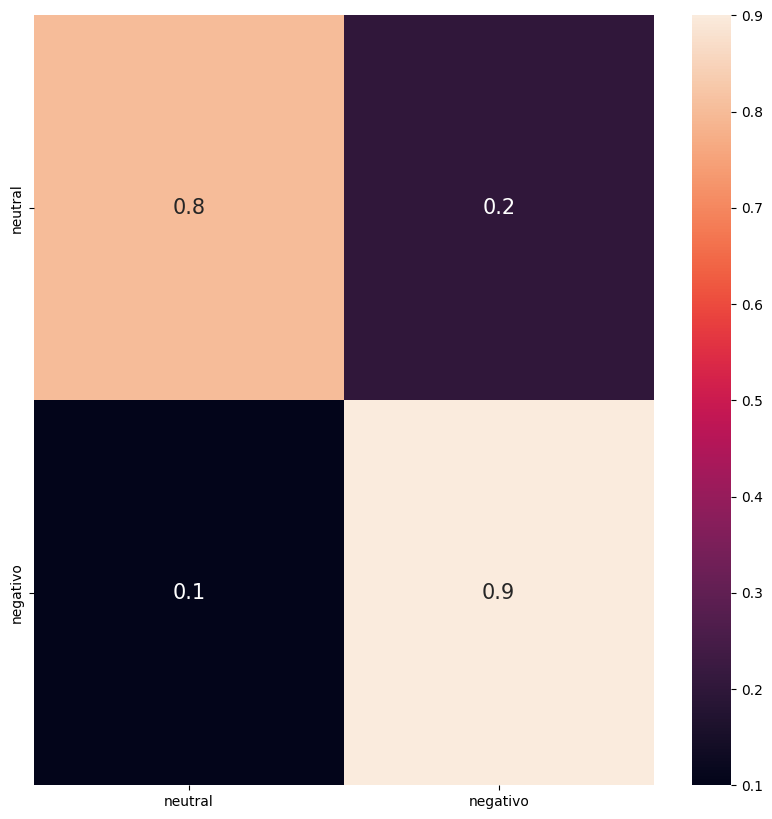

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['neutral','negativo'],columns = ['neutral','negativo'])
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [76]:
from sklearn.metrics import *


In [89]:
valores = [accuracy_score(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1)),
precision_score(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1), average='micro'),
recall_score(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1), average='micro'),
f1_score(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1), average='micro'),
]
medidas = ["Accuracy","Precision","Sensibilidad","F1-score"]
evaluacion = pd.DataFrame(valores, medidas)
evaluacion


,0
Accuracy,0.866667
Precision,0.866667
Sensibilidad,0.866667
F1-score,0.866667


In [106]:
sentiment = ['Neutro','Negativo','Positivo']
sequence = tokenizer.texts_to_sequences(['cortina de humo'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 88ms/step


'Neutro'

# Aplicando algoritmo de machine learning

In [184]:
copia_dft

,Date,Tweet Text,Author Location,puntaje,clasificacion
0,2023-10-08 15:14:52,dias creo,Alejandro Villanueva,0.17,negativo
1,2023-10-08 15:15:45,sobraran agua juntada,NaN,0.31,negativo
2,2023-10-08 15:25:23,absurda idea amenazar ciudadanos cortar agua v...,NaN,0.23,negativo
3,2023-10-08 15:31:54,revisen favor esperando viernes,Lima Callao,0.00,negativo
5,2023-10-08 15:47:58,vete carajo compraron mierdas juntar agua dia ...,NaN,0.03,negativo
...,...,...,...,...,...
155,2023-10-11 14:40:11,primero desistir oficinas san isidro ir conos ...,NaN,0.00,negativo
156,2023-10-12 14:29:25,suministro villa maria triunfo agua viernes pa...,Lima-Peru,0.00,negativo
157,2023-10-14 10:54:11,falso suministro aun agua viernes pasado pese ...,Lima-Peru,0.01,negativo
158,2023-10-14 18:57:28,fines semana cortan agua decir urbanizacion um...,NaN,0.01,negativo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Paso 1: Preprocesamiento de Datos
copia_dft['Author Location'].fillna('Unknown', inplace=True)  # Por ejemplo, llena los valores nulos con 'Unknown'
le = LabelEncoder()
copia_dft['Author Location'] = le.fit_transform(copia_dft['Author Location'])
copia_dft['clasificacion'] = le.fit_transform(copia_dft['clasificacion'])

X1 = copia_dft[['Author Location', 'puntaje']]
y1 = copia_dft['clasificacion']


X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train1, y_train1)




In [186]:
# Paso 3: Evaluación del Modelo
y_pred1 = model.predict(X_test1)
accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test1, y_pred1))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

